In [0]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [0]:
# More imports
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
### build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # short distance
#   y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [0]:
# Try a linear model first - note: it is classification now!
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the network
r = model.fit(
  X, Y,
  epochs=100,
  validation_split=0.5,
)

W0802 17:35:43.576378 139942316631936 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 1s 336us/sample - loss: 0.8042 - accuracy: 0.5036 - val_loss: 0.7160 - val_accuracy: 0.4892
Epoch 2/100
2500/2500 [==============================] - 0s 144us/sample - loss: 0.6987 - accuracy: 0.5200 - val_loss: 0.6976 - val_accuracy: 0.4864
Epoch 3/100
2500/2500 [==============================] - 0s 136us/sample - loss: 0.6932 - accuracy: 0.5232 - val_loss: 0.6985 - val_accuracy: 0.5052
Epoch 4/100
2500/2500 [==============================] - 0s 136us/sample - loss: 0.6936 - accuracy: 0.5060 - val_loss: 0.7006 - val_accuracy: 0.4880
Epoch 5/100
2500/2500 [==============================] - 0s 143us/sample - loss: 0.6940 - accuracy: 0.5088 - val_loss: 0.6985 - val_accuracy: 0.4964
Epoch 6/100
2500/2500 [==============================] - 0s 132us/sample - loss: 0.6939 - accuracy: 0.5228 - val_loss: 0.6983 - val_accuracy: 0.5024
Epoch 7/100
2500/2500 [==============================] - 0

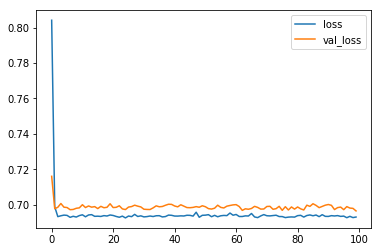

In [0]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

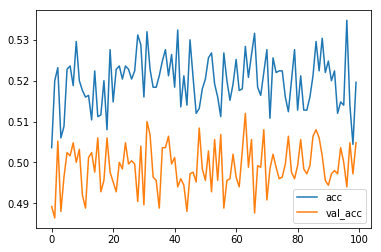

In [0]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
# Now try a simple RNN
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
# x = LSTM(5)(i)
x = SimpleRNN(5)(i)
# x = GRU(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  # optimizer='rmsprop',
#   optimizer='adam',
  optimizer=Adam(lr=0.01),
  # optimizer=SGD(lr=0.1, momentum=0.9),
  metrics=['accuracy'],
)

In [0]:
# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 2s 891us/sample - loss: 0.7001 - accuracy: 0.5000 - val_loss: 0.6977 - val_accuracy: 0.4880
Epoch 2/200
2500/2500 [==============================] - 2s 665us/sample - loss: 0.6928 - accuracy: 0.5208 - val_loss: 0.6949 - val_accuracy: 0.5036
Epoch 3/200
2500/2500 [==============================] - 2s 675us/sample - loss: 0.6928 - accuracy: 0.5064 - val_loss: 0.6951 - val_accuracy: 0.4872
Epoch 4/200
2500/2500 [==============================] - 2s 662us/sample - loss: 0.6888 - accuracy: 0.5344 - val_loss: 0.6956 - val_accuracy: 0.5104
Epoch 5/200
2500/2500 [==============================] - 2s 672us/sample - loss: 0.6830 - accuracy: 0.5520 - val_loss: 0.6772 - val_accuracy: 0.5764
Epoch 6/200
2500/2500 [==============================] - 2s 661us/sample - loss: 0.6459 - accuracy: 0.6460 - val_loss: 0.6166 - val_accuracy: 0.6908
Epoch 7/200
2500/2500 [==============================] - 2

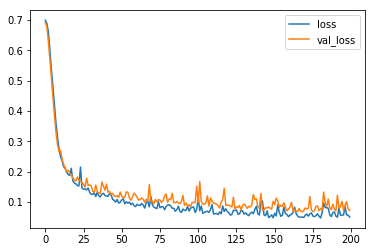

In [0]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

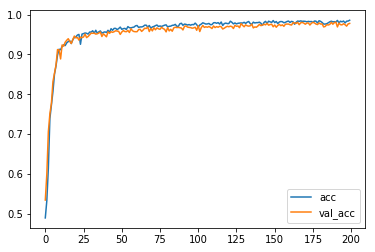

In [0]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
# Now change to the long distance problem

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [0]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 2s 684us/sample - loss: 0.6962 - accuracy: 0.5112 - val_loss: 0.6985 - val_accuracy: 0.5076
Epoch 2/200
2500/2500 [==============================] - 1s 461us/sample - loss: 0.6923 - accuracy: 0.5360 - val_loss: 0.6937 - val_accuracy: 0.5252
Epoch 3/200
2500/2500 [==============================] - 1s 444us/sample - loss: 0.6892 - accuracy: 0.5424 - val_loss: 0.6949 - val_accuracy: 0.5144
Epoch 4/200
2500/2500 [==============================] - 1s 441us/sample - loss: 0.6876 - accuracy: 0.5532 - val_loss: 0.6858 - val_accuracy: 0.5528
Epoch 5/200
2500/2500 [==============================] - 1s 444us/sample - loss: 0.6864 - accuracy: 0.5392 - val_loss: 0.6915 - val_accuracy: 0.5176
Epoch 6/200
2500/2500 [==============================] - 1s 455us/sample - loss: 0.6820 - accuracy: 0.5556 - val_loss: 0.6825 - val_accuracy: 0.5432
Epoch 7/200
2500/2500 [==============================] - 1

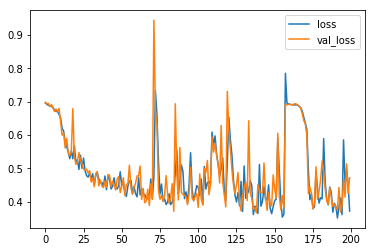

In [0]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

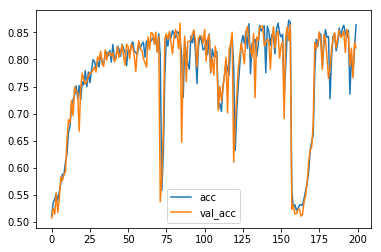

In [0]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 4s 2ms/sample - loss: 0.6944 - accuracy: 0.5036 - val_loss: 0.6936 - val_accuracy: 0.4928
Epoch 2/200
2500/2500 [==============================] - 0s 183us/sample - loss: 0.6939 - accuracy: 0.4996 - val_loss: 0.6932 - val_accuracy: 0.5012
Epoch 3/200
2500/2500 [==============================] - 0s 182us/sample - loss: 0.6936 - accuracy: 0.5004 - val_loss: 0.6931 - val_accuracy: 0.5120
Epoch 4/200
2500/2500 [==============================] - 0s 182us/sample - loss: 0.6938 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.5056
Epoch 5/200
2500/2500 [==============================] - 0s 181us/sample - loss: 0.6933 - accuracy: 0.5100 - val_loss: 0.6933 - val_accuracy: 0.5048
Epoch 6/200
2500/2500 [==============================] - 0s 181us/sample - loss: 0.6935 - accuracy: 0.4952 - val_loss: 0.6932 - val_accuracy: 0.5056
Epoch 7/200
2500/2500 [==============================] - 0s 

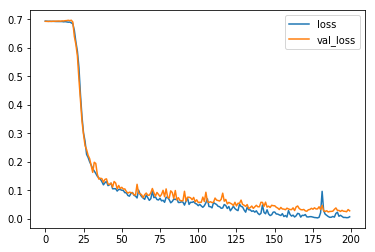

In [0]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

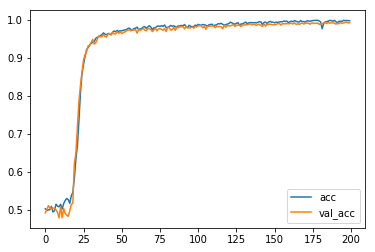

In [0]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
# Make the problem harder by making T larger
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [0]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6972 - accuracy: 0.4936 - val_loss: 0.6926 - val_accuracy: 0.5184
Epoch 2/200
2500/2500 [==============================] - 2s 757us/sample - loss: 0.6938 - accuracy: 0.5140 - val_loss: 0.6919 - val_accuracy: 0.5192
Epoch 3/200
2500/2500 [==============================] - 2s 764us/sample - loss: 0.6930 - accuracy: 0.5180 - val_loss: 0.6929 - val_accuracy: 0.5036
Epoch 4/200
2500/2500 [==============================] - 2s 761us/sample - loss: 0.6923 - accuracy: 0.5072 - val_loss: 0.6937 - val_accuracy: 0.5228
Epoch 5/200
2500/2500 [==============================] - 2s 752us/sample - loss: 0.6923 - accuracy: 0.5192 - val_loss: 0.6936 - val_accuracy: 0.5124
Epoch 6/200
2500/2500 [==============================] - 2s 756us/sample - loss: 0.6930 - accuracy: 0.5172 - val_loss: 0.6936 - val_accuracy: 0.5104
Epoch 7/200
2500/2500 [==============================] - 2s 

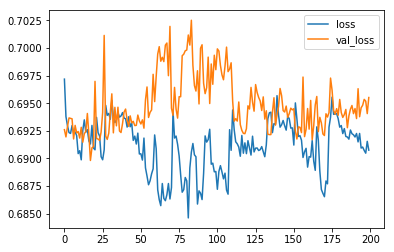

In [0]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

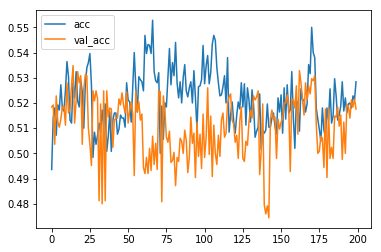

In [0]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 1s 537us/sample - loss: 0.6931 - accuracy: 0.5204 - val_loss: 0.6922 - val_accuracy: 0.5196
Epoch 2/200
2500/2500 [==============================] - 0s 195us/sample - loss: 0.6933 - accuracy: 0.5192 - val_loss: 0.6912 - val_accuracy: 0.5304
Epoch 3/200
2500/2500 [==============================] - 0s 191us/sample - loss: 0.6924 - accuracy: 0.5216 - val_loss: 0.6915 - val_accuracy: 0.5292
Epoch 4/200
2500/2500 [==============================] - 1s 203us/sample - loss: 0.6917 - accuracy: 0.5176 - val_loss: 0.6912 - val_accuracy: 0.5244
Epoch 5/200
2500/2500 [==============================] - 0s 192us/sample - loss: 0.6927 - accuracy: 0.5200 - val_loss: 0.6914 - val_accuracy: 0.5248
Epoch 6/200
2500/2500 [==============================] - 0s 186us/sample - loss: 0.6920 - accuracy: 0.5172 - val_loss: 0.6919 - val_accuracy: 0.5332
Epoch 7/200
2500/2500 [==============================] - 0

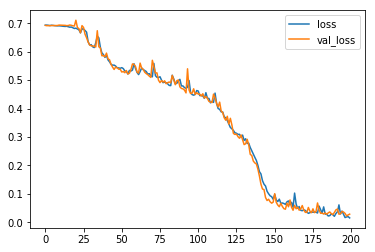

In [0]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

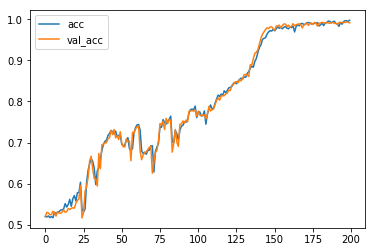

In [0]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
# Now test our GRU
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = GRU(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/400
2500/2500 [==============================] - 1s 586us/sample - loss: 0.6975 - accuracy: 0.5072 - val_loss: 0.6923 - val_accuracy: 0.5256
Epoch 2/400
2500/2500 [==============================] - 0s 182us/sample - loss: 0.6931 - accuracy: 0.5088 - val_loss: 0.6931 - val_accuracy: 0.5180
Epoch 3/400
2500/2500 [==============================] - 0s 185us/sample - loss: 0.6930 - accuracy: 0.5020 - val_loss: 0.6946 - val_accuracy: 0.4880
Epoch 4/400
2500/2500 [==============================] - 0s 187us/sample - loss: 0.6941 - accuracy: 0.4996 - val_loss: 0.6931 - val_accuracy: 0.5148
Epoch 5/400
2500/2500 [==============================] - 0s 198us/sample - loss: 0.6926 - accuracy: 0.5204 - val_loss: 0.6932 - val_accuracy: 0.5104
Epoch 6/400
2500/2500 [==============================] - 0s 184us/sample - loss: 0.6923 - accuracy: 0.5116 - val_loss: 0.6928 - val_accuracy: 0.5264
Epoch 7/400
2500/2500 [==============================] - 0

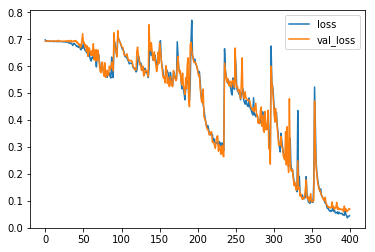

In [0]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

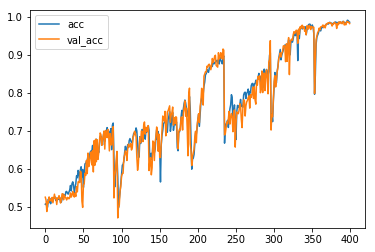

In [0]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
# Make the problem harder by making T larger
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [0]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/400
2500/2500 [==============================] - 1s 579us/sample - loss: 0.6955 - accuracy: 0.4844 - val_loss: 0.6933 - val_accuracy: 0.5120
Epoch 2/400
2500/2500 [==============================] - 1s 207us/sample - loss: 0.6944 - accuracy: 0.4896 - val_loss: 0.6940 - val_accuracy: 0.4900
Epoch 3/400
2500/2500 [==============================] - 1s 211us/sample - loss: 0.6939 - accuracy: 0.4992 - val_loss: 0.6937 - val_accuracy: 0.4904
Epoch 4/400
2500/2500 [==============================] - 1s 204us/sample - loss: 0.6931 - accuracy: 0.5112 - val_loss: 0.6932 - val_accuracy: 0.4904
Epoch 5/400
2500/2500 [==============================] - 1s 218us/sample - loss: 0.6934 - accuracy: 0.4968 - val_loss: 0.6930 - val_accuracy: 0.5036
Epoch 6/400
2500/2500 [==============================] - 0s 199us/sample - loss: 0.6930 - accuracy: 0.5080 - val_loss: 0.6930 - val_accuracy: 0.5004
Epoch 7/400
2500/2500 [==============================] - 1

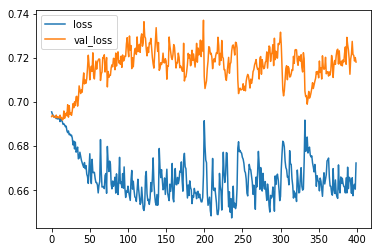

In [0]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

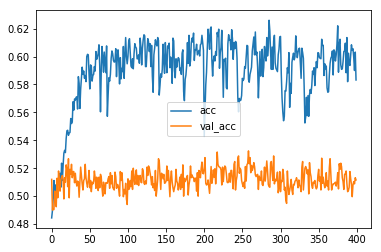

In [0]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
# Now try a LSTM with Global Max Pooling
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 2
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=100,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 1s 587us/sample - loss: 0.6942 - accuracy: 0.5004 - val_loss: 0.6932 - val_accuracy: 0.4820
Epoch 2/100
2500/2500 [==============================] - 1s 226us/sample - loss: 0.6931 - accuracy: 0.5032 - val_loss: 0.6933 - val_accuracy: 0.5240
Epoch 3/100
2500/2500 [==============================] - 1s 223us/sample - loss: 0.6925 - accuracy: 0.5148 - val_loss: 0.6942 - val_accuracy: 0.5136
Epoch 4/100
2500/2500 [==============================] - 1s 221us/sample - loss: 0.6919 - accuracy: 0.5044 - val_loss: 0.6902 - val_accuracy: 0.5056
Epoch 5/100
2500/2500 [==============================] - 1s 223us/sample - loss: 0.6863 - accuracy: 0.5264 - val_loss: 0.6836 - val_accuracy: 0.5328
Epoch 6/100
2500/2500 [==============================] - 1s 220us/sample - loss: 0.6801 - accuracy: 0.5356 - val_loss: 0.6773 - val_accuracy: 0.5248
Epoch 7/100
2500/2500 [==============================] - 1

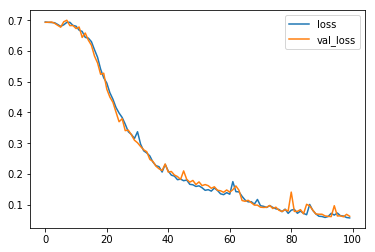

In [0]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

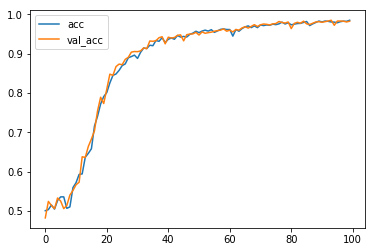

In [0]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()